**FACE RECOGNITION**

NAME      : SETHURAM B

ROLL NO   : 202IT215

DEPARTMENT: INFORMATION TECHNOLOGY

In [ ]:
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     |████████████████████████████████| 100.1 MB 1.2 MB/s 
     |████████████████████████████████| 812 kB 28.4 MB/s 
     |████████████████████████████████| 2.3 MB 43.8 MB/s 


In [ ]:
uploaded = files.upload()

Saving image.jpg to image.jpg


Number of faces: 1
Time taken: 0.14  seconds


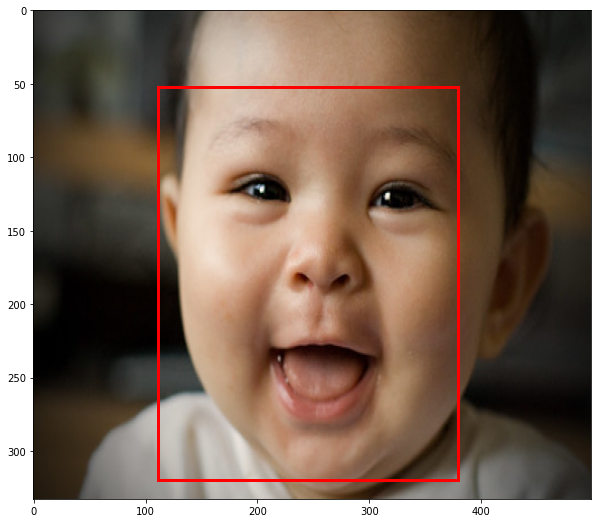

In [ ]:
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(10,9))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Number of faces: 1
Time taken: 0.5511770248413086  seconds


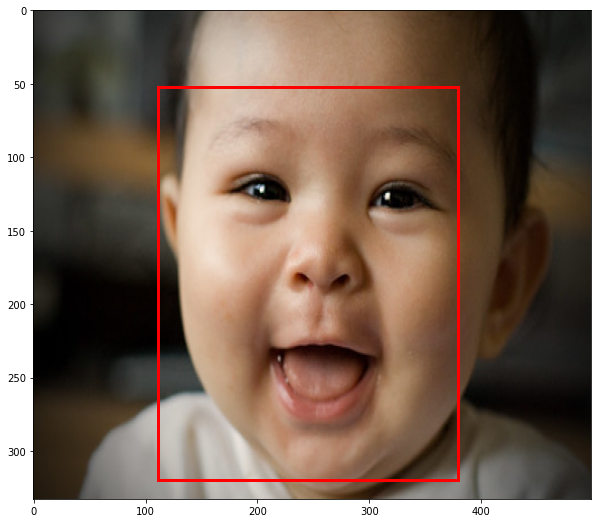

In [ ]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(10,9))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")

In [ ]:
uploaded = files.upload()

Saving image.jpg to image (1).jpg


Number of faces: 1
Time taken: 0.1787102222442627  seconds


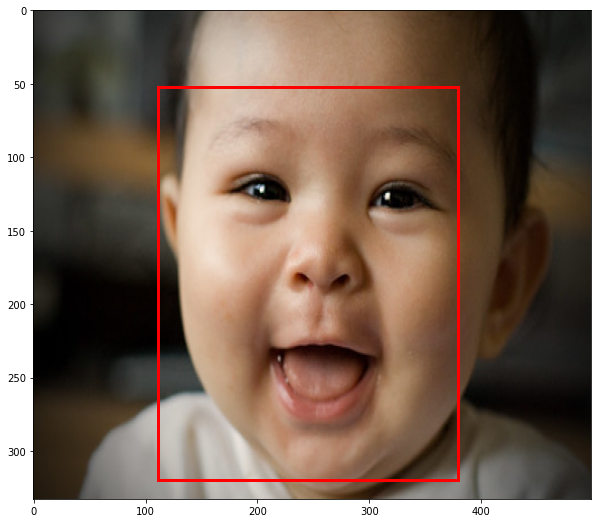

In [ ]:
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(10,9))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")